In [18]:
pip install pycountry

# 1. Importing libraries

In [19]:
import pandas as pd
import numpy as np
import json
from bs4 import BeautifulSoup
import requests
import pprint
import matplotlib.pyplot as plt
import pycountry as pc

# 2. Fossil fuel and API definitions


In [20]:
fuels = {}

fuels['coal'] = '7-1'
fuels['anth'] = '11-1' #Anthracite coal
fuels['met_coal']: '130-1' #Metalurgical coal
fuels['bit'] = '12-1' #Bituminous coal
fuels['sub_bit'] = '119-1' #Sub-bituminous coal
fuels['lig'] = '14-1' #Lignite coal
fuels['met_coke'] = '21-1' #Metallurgical coke
fuels['coal_res'] = '7-6'

fuels_con = {}

fuels_con['coal'] = '7-2'
fuels_con['anth'] = '11-2' #Anthracite coal
fuels_con['met_coal']: '130-2' #Metalurgical coal
fuels_con['bit'] = '12-2' #Bituminous coal
fuels_con['sub_bit'] = '119-2' #Sub-bituminous coal
fuels_con['lig'] = '14-2' #Lignite coal
fuels_con['met_coke'] = '21-2' #Metallurgical coke

fuels_imp = {}

fuels_imp['coal'] = '7-3'
fuels_imp['anth'] = '11-3' #Anthracite coal
fuels_imp['met_coal']: '130-3' #Metalurgical coal
fuels_imp['bit'] = '12-3' #Bituminous coal
fuels_imp['sub_bit'] = '119-3' #Sub-bituminous coal
fuels_imp['lig'] = '14-3' #Lignite coal
fuels_imp['met_coke'] = '21-3' #Metallurgical coke



country = 'WORL'

url_1 = 'http://api.eia.gov/series/?api_key=15ee74a4c2bd80f93abd7257d8600fdb&series_id=INTL.'
url_2 = 'TST.A'
url_3 = 'MST.A'

#API URL format
#url_1 + fuel + '-' + country + '-' + url_2

# 3. Example coal data extraction

In [21]:
def plot_prod_vals(emmission,country):
  url = url_1 + emmission + '-' + country + '-' + url_2
  r = requests.get(url)
  c = r.content
  soup = BeautifulSoup(c)
  data = json.loads(soup.find_all('p')[0].get_text())['series'][0]['data']
  year = [x[0] for x in data]
  val = [x[1] for x in data]
  plt.figure(figsize=(12,6))
  plt.scatter(year,val)
  plt.xticks(rotation=90)

def get_fuel_data(fuel, country):
  #print (fuel)
  #print (country)
  if str(country) in list(df_countries['code']):
    if fuel[-1] != '6':
      url = url_1 + fuel + '-' + country + '-' + url_2
    else: 
      url = url_1 + fuel + '-' + country + '-' + url_3
    r = requests.get(url)
    c = r.content
    soup = BeautifulSoup(c)
    try:
      data = json.loads(soup.find_all('p')[0].get_text())['series'][0]['data']
      year = [x[0] for x in data]
      val = [x[1] for x in data]
      return year,val
    except:
      return np.nan, np.nan
  else:
    return np.nan, np.nan

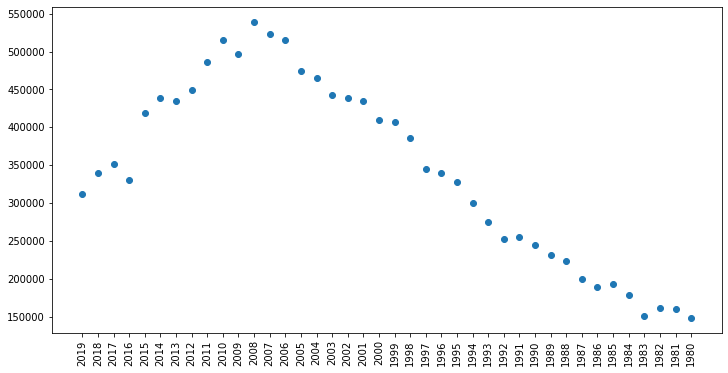

In [22]:
plot_prod_vals('119-1','USA')

# 4. Creating a dataset of country codes

In [23]:
codes = []
country = []
for i in list(pc.countries):
  codes.append(i.alpha_3)
  country.append(i.name)

df_countries = pd.DataFrame()
df_countries['country'] = country
df_countries['code'] = codes

df_countries.head()

,country,code
0,Aruba,ABW
1,Afghanistan,AFG
2,Angola,AGO
3,Anguilla,AIA
4,Åland Islands,ALA


# 5. Retrieving fossil fuel data
- For each fuel type
- For each country 
- For each year

In [24]:
fuels.values()

dict_values(['7-1', '11-1', '12-1', '119-1', '14-1', '21-1', '7-6'])

In [25]:
def plot_fuel_country(df,fuel):
  df = df[df['fuel']==fuel]
  plt.figure(figsize=(16,8))
  for i in df['country'].unique():
    df_single = df[df['country']==i]
    df_single.index = df_single['year'].apply(pd.to_datetime)
    plt.plot(df_single['value'],label=i,alpha=0.7)
  plt.ylabel('Thousand short tons',size=15)
  plt.xlabel('Year',size=15)
  plt.legend()

In [34]:
def retrieve_api_data(countries,fuel_input):
  year = range(1980,2020)
  row = []
  df = pd.DataFrame()
  for i in countries: 
    country = [i]*len(year)
    #print (country)
    #print (i)
    if (fuel_input[-1] == '1') | (fuel_input[-1] == '6'): 
      fuel_dict = fuels
    elif fuel_input[-1] == '2':
      fuel_dict = fuels_con
    else:
      fuel_dict = fuels_imp
    #for j in fuel_dict.values():
    for j in [fuel_input]:
      #print (j)
      fuel = [j]*len(year)
      #print (fuel)
      yr,val = get_fuel_data(j,i)
      #print (val)
      #print (yr)
      #print (val)
      #print ()
      temp = pd.DataFrame()
      temp['country'] = country
      temp['fuel'] = j
      if type(yr)==list: 
        if len(yr) != len(year):
          diff = len(year) - len(yr) 
          for i in range(diff):
            yr.append(np.nan)
            val.append(np.nan)
      else:
        yr = [np.nan]*40
        val = [np.nan]*40
      temp['year'] = yr 
      temp['value'] = val
      df = df.append(temp)
  plot_fuel_country(df,fuel_input)
  return df

### Fuel production - Coal

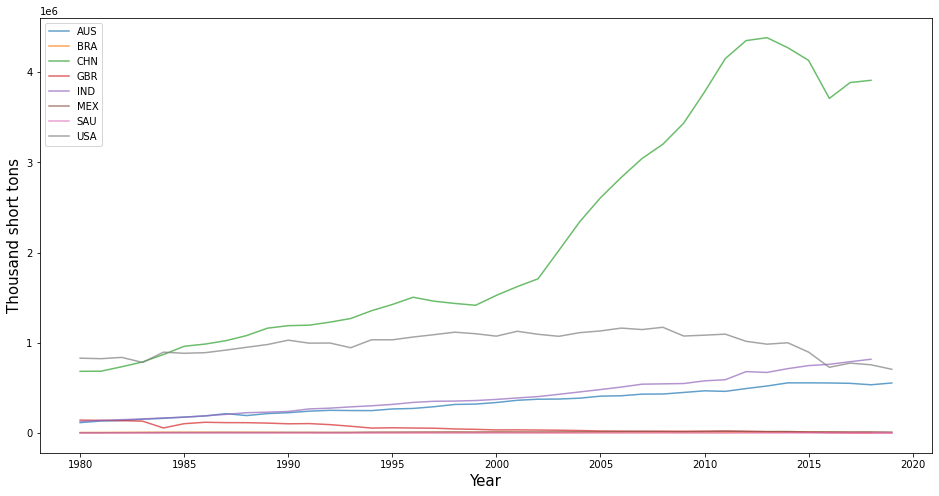

In [27]:
countries_list = ['China','India','United States','Brazil','Australia','Saudi Arabia','Mexico','United Kingdom']
retrieve_api_data(df_countries[df_countries['country'].isin(countries_list)]['code'],fuels['coal'])

### Fuel production - Bituminous coal

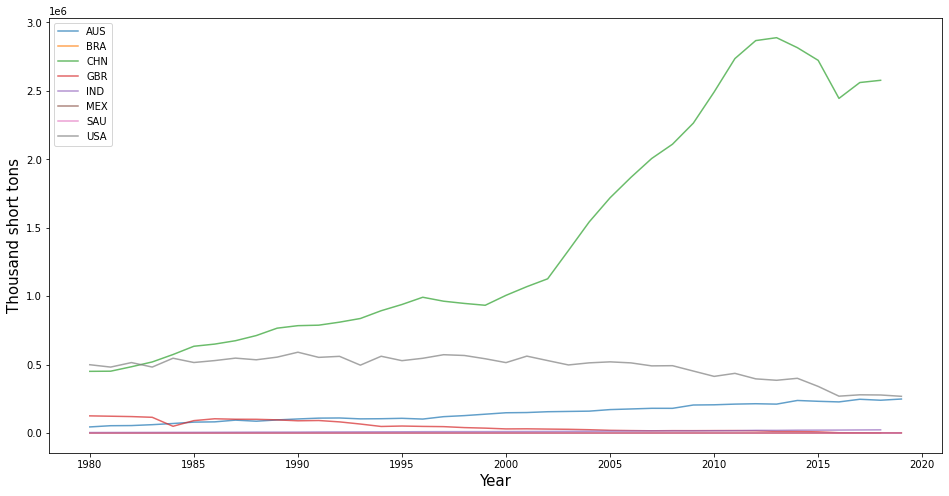

In [28]:
countries_list = ['China','India','United States','Brazil','Australia','Saudi Arabia','Mexico','United Kingdom']
retrieve_api_data(df_countries[df_countries['country'].isin(countries_list)]['code'],fuels['bit'])

### Fuel consumption - Coal

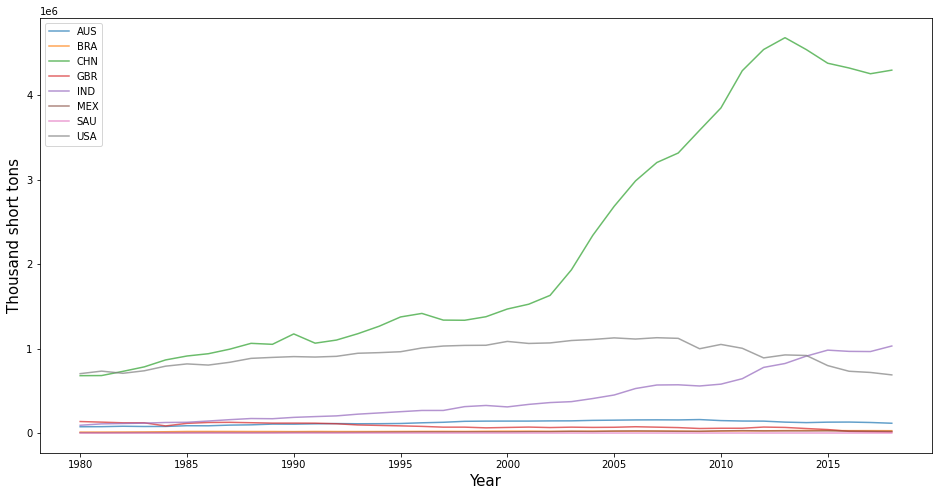

In [29]:
countries_list = ['China','India','United States','Brazil','Australia','Saudi Arabia','Mexico','United Kingdom']
retrieve_api_data(df_countries[df_countries['country'].isin(countries_list)]['code'],fuels_con['coal'])

### Fuel consumption - Bituminous coal

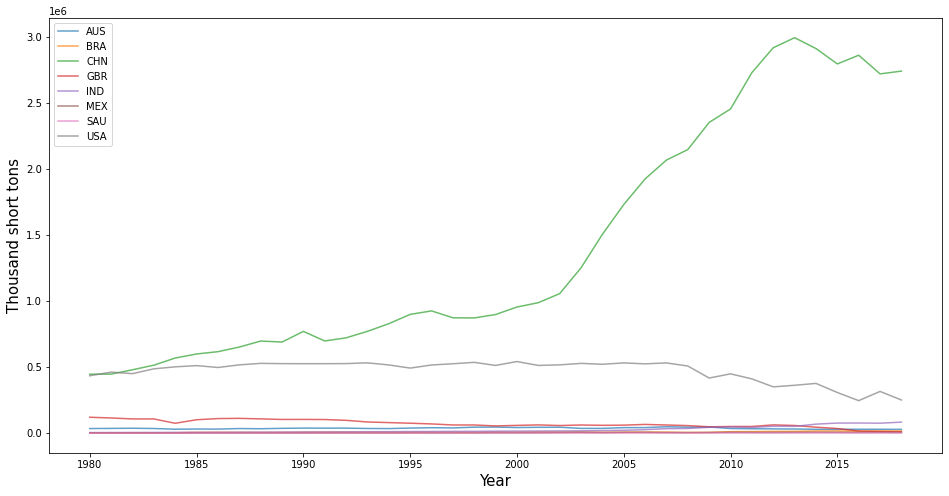

In [30]:
countries_list = ['China','India','United States','Brazil','Australia','Saudi Arabia','Mexico','United Kingdom']
retrieve_api_data(df_countries[df_countries['country'].isin(countries_list)]['code'],fuels_con['bit'])

### Fuel imported - Coal

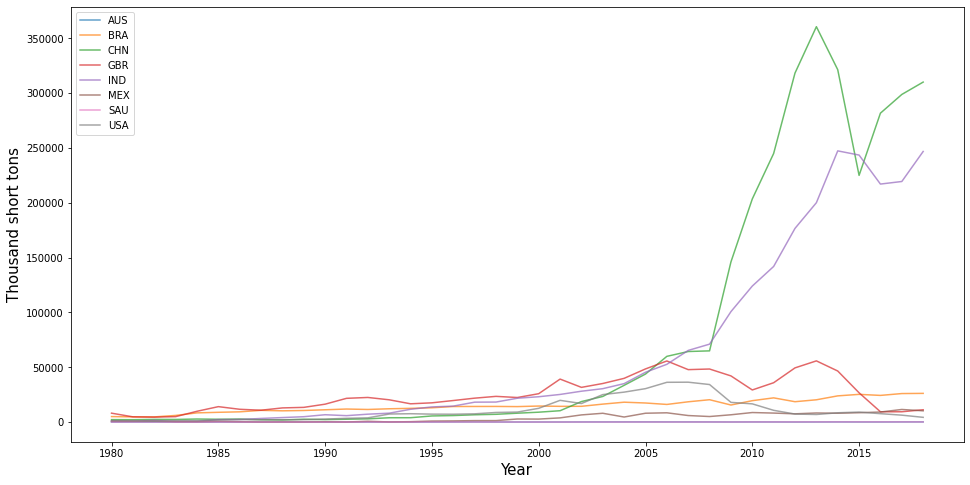

In [31]:
countries_list = ['China','India','United States','Brazil','Australia','Saudi Arabia','Mexico','United Kingdom']
retrieve_api_data(df_countries[df_countries['country'].isin(countries_list)]['code'],fuels_imp['coal'])

### Coal reserves - Coal

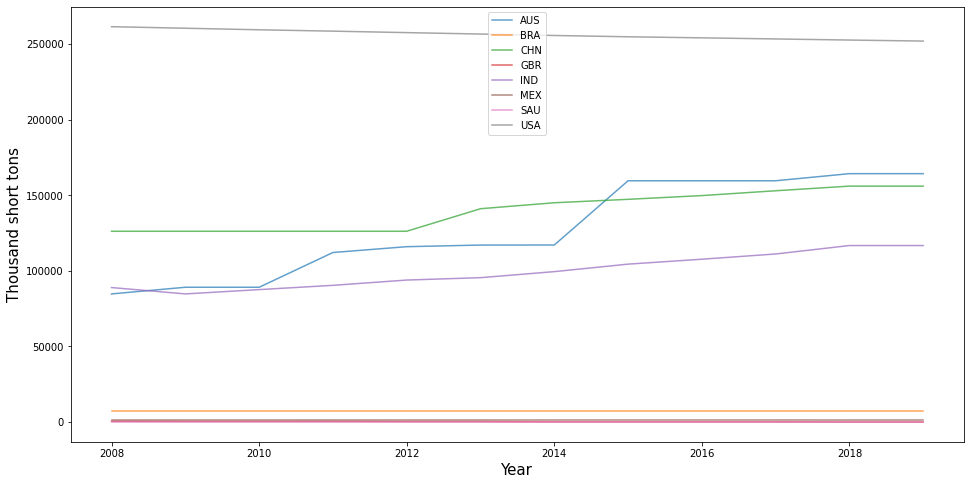

In [32]:
countries_list = ['China','India','United States','Brazil','Australia','Saudi Arabia','Mexico','United Kingdom']
retrieve_api_data(df_countries[df_countries['country'].isin(countries_list)]['code'],fuels['coal_res'])

# 6. Connecting to BigQuery

https://cloud.google.com/blog/products/data-analytics/whats-the-weather-like-using-colab-to-get-more-out-of-bigquery

BigQuery Sandbox: https://cloud.google.com/blog/products/data-analytics/query-without-a-credit-card-introducing-bigquery-sandbox

https://stackoverflow.com/questions/48225833/running-a-bigquery-sql-query-in-python-how-to-authenticate?rq=1

https://colab.research.google.com/drive/11v__wLD2Ya7_yYDRC6Fs9sNwNZyN3Ii1

In [5]:
#@title Install Latest Version of Some Packages
#!pip install --upgrade google-cloud-bigquery
#!pip install --upgrade google-cloud-bigquery-storage
#!pip install --upgrade pyarrow
#!pip install --upgrade google-cloud-core
#!pip install --upgrade chart_studio

In [1]:
from google.colab import auth
auth.authenticate_user()

## 6.1 Attempting to connect to BigQuery using a Project ID

Please enter your own GCP/BigQuery project ID in the form below, then run the cell to set up the BigQuery client.

If you don’t already have a GCP project, there are [2 free options available](https://cloud.google.com/bigquery/):

1. For BigQuery specifically, sign up for [BigQuery sandbox](https://cloud.google.com/blog/products/data-analytics/query-without-a-credit-card-introducing-bigquery-sandbox) (1 TB query, 10 GB storage capacity per month).
2. If you want to experiment with multiple GCP products, activate the [free trial](https://cloud.google.com/free/) ($300 credit for up to 12 months).

In [37]:
#@title Enter GCP/BigQuery Project ID
project_id = 'world-fuel-data' #@param{type:"string"}

# Packages used for interfacing w/ BigQuery from Python
from google.cloud import bigquery
from google.cloud import bigquery_storage_v1beta1

# Create BigQuery client
bq_client = bigquery.Client(project = project_id)

# Create BigQuery storage client
bq_storage_client = bigquery_storage_v1beta1.BigQueryStorageClient()

Connecting to the BigQuery project using the %%bigquery Python command and executing a simple query using one of the public datasets and storing the results in a Pandas dataframe called *ncaa_data*

In [36]:
#%%bigquery ncaa_data --project {project_id}

#SELECT *
#FROM
#    `bigquery-public-data.noaa_gsod.gsod2019` 
#LIMIT 5

#ncaa_data

## 6.2 Creating a table in the BigQuery project

,country,fuel,year,value
0,AUS,7-1,2019,554664.755040
1,AUS,7-1,2018,534719.557900
2,AUS,7-1,2017,550567.468770
3,AUS,7-1,2016,554763.962940
4,AUS,7-1,2015,556119.520785


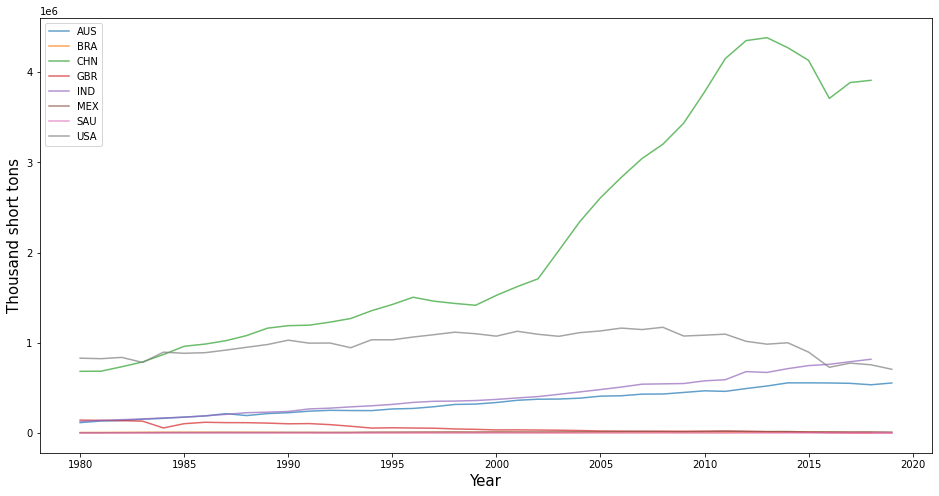

In [35]:
countries_list = ['China','India','United States','Brazil','Australia','Saudi Arabia','Mexico','United Kingdom']
df_bq = retrieve_api_data(df_countries[df_countries['country'].isin(countries_list)]['code'],fuels['coal'])
df_bq.head()

In [39]:
#@title Write All Weather Station Data to BigQuery Table
output_dataset_id = 'world_fuel_data' #@param{type:'string'}
output_table_id = 'coal_production_data' #@param{type:'string'}
replace_or_append_output = 'replace' #@param{type:'string'} ['replace', 'append']

# Combine project and dataset
project_dataset = (bq_client.project + '.' + output_dataset_id)

try:
  bq_client.get_dataset(output_dataset_id)
  print("Dataset " + project_dataset + " exists\n")
except:
  print("Dataset " + project_dataset + " doesn't exist, so creating it\n")
  dataset = bq_client.create_dataset(bigquery.Dataset(project_dataset))

job_config = bigquery.LoadJobConfig()

# Modify job config depending on if we want to replace or append to table
if(replace_or_append_output == 'replace'):
 job_config.write_disposition = bigquery.WriteDisposition.WRITE_TRUNCATE  
else:  
 job_config.write_disposition = bigquery.WriteDisposition.WRITE_APPEND

dataset_ref = bq_client.dataset(output_dataset_id)
table_ref = dataset_ref.table(output_table_id)

# Get timestamp (UTC), add to data frame at granularity of seconds
df['timestamp'] = pd.Timestamp.now(tz = 'UTC').ceil(freq = 's')

# Use client functionality to load BigQuery table from Pandas data frame
bq_client.load_table_from_dataframe(
 dataframe = df_bq,
 destination = table_ref,
 job_config = job_config
 ).result()
 
print('All Station Fit Info output (' + replace_or_append_output + ') to ' +
 project_dataset + '.' + output_table_id +
 '\n')

Dataset world-fuel-data.world_fuel_data exists



/usr/local/lib/python3.6/dist-packages/google/cloud/bigquery/_pandas_helpers.py:275: UserWarning: Unable to determine type of column 'country'.
  warnings.warn(u"Unable to determine type of column '{}'.".format(column))


All Station Fit Info output (replace) to world-fuel-data.world_fuel_data.coal_production_data



# 7. Connecting to Looker
To be completed